# Question 2 Solution

In [8]:
%pip install pandas numpy matplotlib seaborn


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## a) Set a seed and take a random sample of 25 observations. Find mean Glucose and highest Glucose values of this sample and compare with population statistics using charts.

In [10]:
np.random.seed(42)

sample_25 = df.sample(n=25)

sample_mean_glucose = sample_25['Glucose'].mean()
sample_max_glucose = sample_25['Glucose'].max()

pop_mean_glucose = df['Glucose'].mean()
pop_max_glucose = df['Glucose'].max()

print(f"Sample Mean Glucose: {sample_mean_glucose}")
print(f"Population Mean Glucose: {pop_mean_glucose}")
print(f"Sample Max Glucose: {sample_max_glucose}")
print(f"Population Max Glucose: {pop_max_glucose}")

Sample Mean Glucose: 116.64
Population Mean Glucose: 120.89453125
Sample Max Glucose: 183
Population Max Glucose: 199


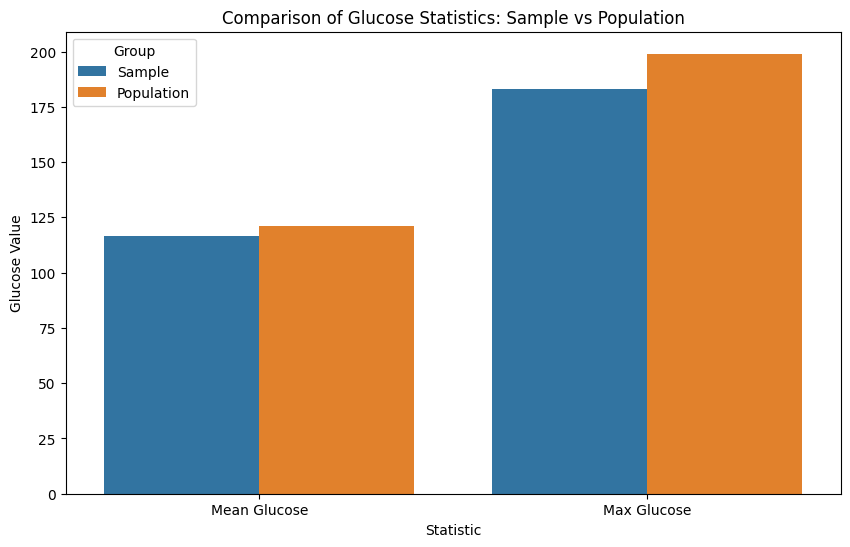

In [11]:
stats_data = {
    'Statistic': ['Mean Glucose', 'Mean Glucose', 'Max Glucose', 'Max Glucose'],
    'Value': [sample_mean_glucose, pop_mean_glucose, sample_max_glucose, pop_max_glucose],
    'Group': ['Sample', 'Population', 'Sample', 'Population']
}
stats_df = pd.DataFrame(stats_data)

plt.figure(figsize=(10, 6))
sns.barplot(data=stats_df, x='Statistic', y='Value', hue='Group')
plt.title('Comparison of Glucose Statistics: Sample vs Population')
plt.ylabel('Glucose Value')
plt.show()

## b) Find the 98th percentile of BMI of your sample and the population and compare the results using charts.

Sample 98th Percentile BMI: 40.248
Population 98th Percentile BMI: 47.52599999999996


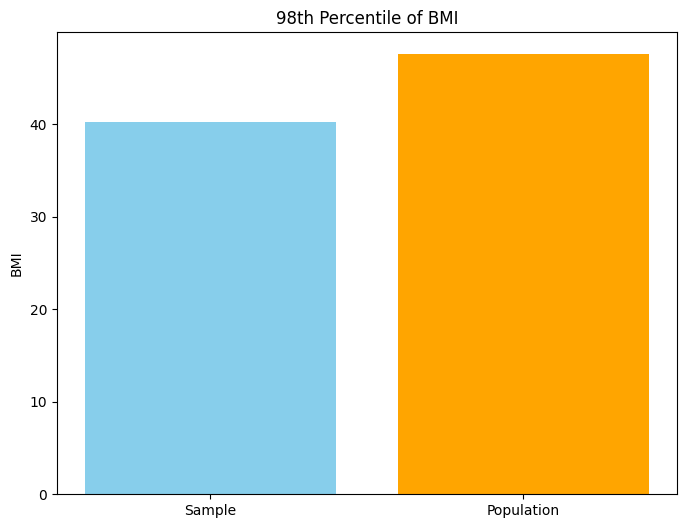

In [12]:
sample_98_bmi = np.percentile(sample_25['BMI'], 98)
pop_98_bmi = np.percentile(df['BMI'], 98)

print(f"Sample 98th Percentile BMI: {sample_98_bmi}")
print(f"Population 98th Percentile BMI: {pop_98_bmi}")

plt.figure(figsize=(8, 6))
plt.bar(['Sample', 'Population'], [sample_98_bmi, pop_98_bmi], color=['skyblue', 'orange'])
plt.title('98th Percentile of BMI')
plt.ylabel('BMI')
plt.show()

## c) Using bootstrap (replace= True), create 500 samples (of 150 observation each) from the population and find the average mean, standard deviation and percentile for BloodPressure and compare this with these statistics from the population for the same variable.

In [13]:
n_samples = 500
sample_size = 150
variable = 'BloodPressure'

bootstrap_means = []
bootstrap_stds = []
bootstrap_percentiles = []

np.random.seed(42)

for _ in range(n_samples):
    sample = df.sample(n=sample_size, replace=True)
    bootstrap_means.append(sample[variable].mean())
    bootstrap_stds.append(sample[variable].std())
    bootstrap_percentiles.append(np.percentile(sample[variable], 98))

bootstrap_means = np.array(bootstrap_means)
bootstrap_stds = np.array(bootstrap_stds)
bootstrap_percentiles = np.array(bootstrap_percentiles)

avg_mean = np.mean(bootstrap_means)
avg_std = np.mean(bootstrap_stds)
avg_percentile = np.mean(bootstrap_percentiles)

pop_mean = df[variable].mean()
pop_std = df[variable].std()
pop_percentile = np.percentile(df[variable], 98)

print(f"Bootstrap Average Mean: {avg_mean:.2f} vs Population Mean: {pop_mean:.2f}")
print(f"Bootstrap Average Std: {avg_std:.2f} vs Population Std: {pop_std:.2f}")
print(f"Bootstrap Average 98th Percentile: {avg_percentile:.2f} vs Population 98th Percentile: {pop_percentile:.2f}")

Bootstrap Average Mean: 69.18 vs Population Mean: 69.11
Bootstrap Average Std: 19.07 vs Population Std: 19.36
Bootstrap Average 98th Percentile: 97.90 vs Population 98th Percentile: 99.32


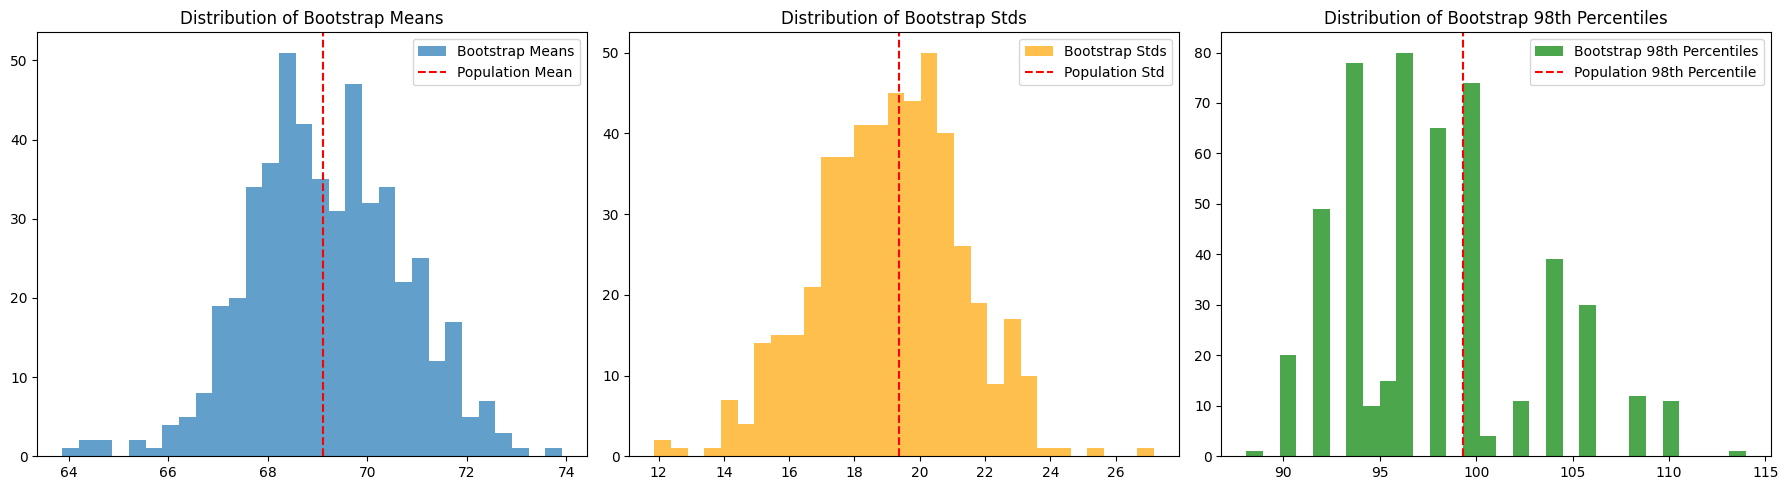

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# mean
axes[0].hist(bootstrap_means, bins=30, alpha=0.7, label='Bootstrap Means')
axes[0].axvline(pop_mean, color='red', linestyle='--', label='Population Mean')
axes[0].set_title('Distribution of Bootstrap Means')
axes[0].legend()

# std
axes[1].hist(bootstrap_stds, bins=30, color='orange', alpha=0.7, label='Bootstrap Stds')
axes[1].axvline(pop_std, color='red', linestyle='--', label='Population Std')
axes[1].set_title('Distribution of Bootstrap Stds')
axes[1].legend()

# percentile
axes[2].hist(bootstrap_percentiles, bins=30, color='green', alpha=0.7, label='Bootstrap 98th Percentiles')
axes[2].axvline(pop_percentile, color='red', linestyle='--', label='Population 98th Percentile')
axes[2].set_title('Distribution of Bootstrap 98th Percentiles')
axes[2].legend()

plt.tight_layout()
plt.show()